In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
cake=pd.read_excel("C:\Xiaohua_Working\working\Teaching\machine_learning_python\Data\Discrete_Cake.xls")
cake.describe

<bound method NDFrame.describe of       id  size  income  age  gender  marriage  edu  children  bid1  wtp1  ...  \
0    326     1       3   52       0       1.0    3         0   2.5     0  ...   
1    167     1       4   65       1       1.0    4         1   1.6     0  ...   
2    170     2       8   66       1       1.0    5         0   1.6     0  ...   
3    712     1       4   51       0       1.0    4         1   1.0     1  ...   
4    354     2       4   47       1       1.0    4         0   2.5     1  ...   
..   ...   ...     ...  ...     ...       ...  ...       ...   ...   ...  ...   
295  816     2       3   23       0       2.0    5         0   2.5     1  ...   
296  159     2       6   33       0       2.0    3         0   1.6     1  ...   
297  329     1       2   22       0       NaN    5         0   2.5     0  ...   
298  355     2       2   40       0       NaN    4         1   2.5     1  ...   
299  808     3       5   70       0       NaN    2         0   1.6     0  .

In [3]:
##logistic learning
##clean the data
cake_clean=cake.dropna()
cake_clean
##use the data for training
x=cake_clean.iloc[:,1:9]  ##x variables are size	income	age	gender	marriage	edu	children
y=cake_clean['wtp1']  ##price of the cake

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,lasso_path,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [5]:
##samle spit for training and tesing
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=10)
##print dimension of train and test samples
print("the dimension of x_train is {}".format(x_train.shape))
print("the dimension of x_test is {}".format(x_test.shape))

the dimension of x_train is (206, 8)
the dimension of x_test is (89, 8)


In [6]:
##train logit model 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',C=10,random_state=0) ##penalty:l1 regularization
lr.fit(x_train,y_train)

LogisticRegression(C=10, random_state=0)

In [7]:
##test the model
from sklearn import metrics
#generate evaluation metrics for train set
print("Train_accuracy:",metrics.accuracy_score(y_train,lr.predict(x_train)))
print("Train_confusion matrix:",metrics.confusion_matrix(y_train,lr.predict(x_train)))
print("Train_classification report:", metrics.classification_report(y_train,lr.predict(x_train)))
#generate evaluation metrics for test set
print("Test_accuracy:",metrics.accuracy_score(y_test,lr.predict(x_test)))
print("Test_confusion matrix:",metrics.confusion_matrix(y_test,lr.predict(x_test)))
print("Test_classification report:", metrics.classification_report(y_test,lr.predict(x_test)))

Train_accuracy: 0.8446601941747572
Train_confusion matrix: [[  7  30]
 [  2 167]]
Train_classification report:               precision    recall  f1-score   support

           0       0.78      0.19      0.30        37
           1       0.85      0.99      0.91       169

    accuracy                           0.84       206
   macro avg       0.81      0.59      0.61       206
weighted avg       0.84      0.84      0.80       206

Test_accuracy: 0.7640449438202247
Test_confusion matrix: [[ 2 16]
 [ 5 66]]
Test_classification report:               precision    recall  f1-score   support

           0       0.29      0.11      0.16        18
           1       0.80      0.93      0.86        71

    accuracy                           0.76        89
   macro avg       0.55      0.52      0.51        89
weighted avg       0.70      0.76      0.72        89



In [8]:
##muticlass case
##use the data for training
x=cake_clean.iloc[:,1:9]  ##x variables are size	income	age	gender	marriage	edu	children
y=cake_clean['brand']  ##price of the cake

In [9]:
##convert y "brand" from character to number
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cake_clean['brand_num']=le.fit_transform(cake_clean.brand)
print(cake_clean)

      id  size  income  age  gender  marriage  edu  children  bid1  wtp1  ...  \
0    326     1       3   52       0       1.0    3         0   2.5     0  ...   
1    167     1       4   65       1       1.0    4         1   1.6     0  ...   
2    170     2       8   66       1       1.0    5         0   1.6     0  ...   
3    712     1       4   51       0       1.0    4         1   1.0     1  ...   
4    354     2       4   47       1       1.0    4         0   2.5     1  ...   
..   ...   ...     ...  ...     ...       ...  ...       ...   ...   ...  ...   
292  543     2       4   21       0       2.0    5         0   2.5     1  ...   
293  109     2       6   22       1       2.0    5         0   1.6     1  ...   
294  352     1       5   30       0       2.0    5         0   2.5     0  ...   
295  816     2       3   23       0       2.0    5         0   2.5     1  ...   
296  159     2       6   33       0       2.0    3         0   1.6     1  ...   

     wtpopen  price  openbi

C:\Users\econy\AppData\Local\Temp\ipykernel_3236\2224980436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cake_clean['brand_num']=le.fit_transform(cake_clean.brand)


In [10]:
y=cake_clean['brand_num']
x=cake_clean.iloc[:,1:9]
print('brand', np.unique(y))


brand [0 1 2 3 4]


In [11]:
#in practice we often normalize the  data, (but not necessary)
##normalizedata
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x1=sc.transform(x)   ##standardize


In [12]:
##split the data into train and test 
##samle spit for training and tesing
x_train, x_test,y_train, y_test=train_test_split(x1,y,test_size=0.3,random_state=1)
##print dimension of train and test samples
print("the dimension of x_train is {}".format(x_train.shape))
print("the dimension of x_test is {}".format(x_test.shape))

the dimension of x_train is (206, 8)
the dimension of x_test is (89, 8)


In [13]:
##train the model
##train logit model 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',C=10,random_state=0) ##penalty:l1 regularization
lr.fit(x_train,y_train)

LogisticRegression(C=10, random_state=0)

In [14]:
##test the model
from sklearn import metrics
#generate evaluation metrics for train set
print("Train_accuracy:",metrics.accuracy_score(y_train,lr.predict(x_train)))
print("Train_confusion matrix:",metrics.confusion_matrix(y_train,lr.predict(x_train)))
print("Train_classification report:", metrics.classification_report(y_train,lr.predict(x_train)))
#generate evaluation metrics for test set
print("Test_accuracy:",metrics.accuracy_score(y_test,lr.predict(x_test)))
print("Test_confusion matrix:",metrics.confusion_matrix(y_test,lr.predict(x_test)))
print("Test_classification report:", metrics.classification_report(y_test,lr.predict(x_test)))

Train_accuracy: 0.3737864077669903
Train_confusion matrix: [[13  5 21  0  1]
 [ 4 14 21  0  0]
 [ 9  9 48  0  0]
 [ 4  7 18  1  0]
 [ 8  5 17  0  1]]
Train_classification report:               precision    recall  f1-score   support

           0       0.34      0.33      0.33        40
           1       0.35      0.36      0.35        39
           2       0.38      0.73      0.50        66
           3       1.00      0.03      0.06        30
           4       0.50      0.03      0.06        31

    accuracy                           0.37       206
   macro avg       0.52      0.30      0.26       206
weighted avg       0.48      0.37      0.31       206

Test_accuracy: 0.2696629213483146
Test_confusion matrix: [[ 5  7  7  0  0]
 [ 2  5 15  0  1]
 [ 5  5 14  0  3]
 [ 4  1  6  0  0]
 [ 1  4  4  0  0]]
Test_classification report:               precision    recall  f1-score   support

           0       0.29      0.26      0.28        19
           1       0.23      0.22      0.22    

c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
lr.coef_  ##get the coeffient of the model

array([[-0.21235887, -0.07062553, -0.13054822,  0.40147906, -0.25231663,
        -0.01534164,  0.04963352, -0.03860501],
       [-0.21818688,  0.28745654, -0.05563431, -0.07395515,  0.37419247,
        -0.01048982, -0.02786541,  0.18278508],
       [ 0.11051407,  0.01998652,  0.0217425 , -0.1490225 , -0.22158401,
         0.18542414,  0.05217404, -0.17921403],
       [ 0.09853586, -0.09938094, -0.04687234, -0.26216432, -0.01221721,
        -0.0498671 , -0.04249176,  0.09765706],
       [ 0.22149582, -0.13743659,  0.21131237,  0.08366291,  0.11192538,
        -0.10972559, -0.03145039, -0.0626231 ]])

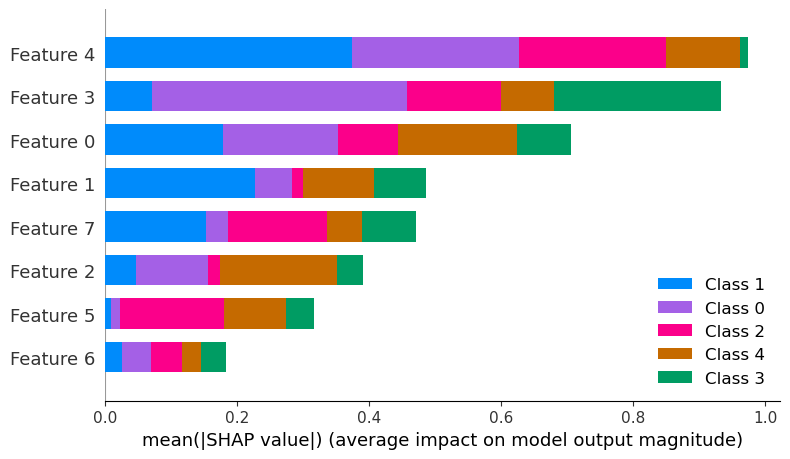

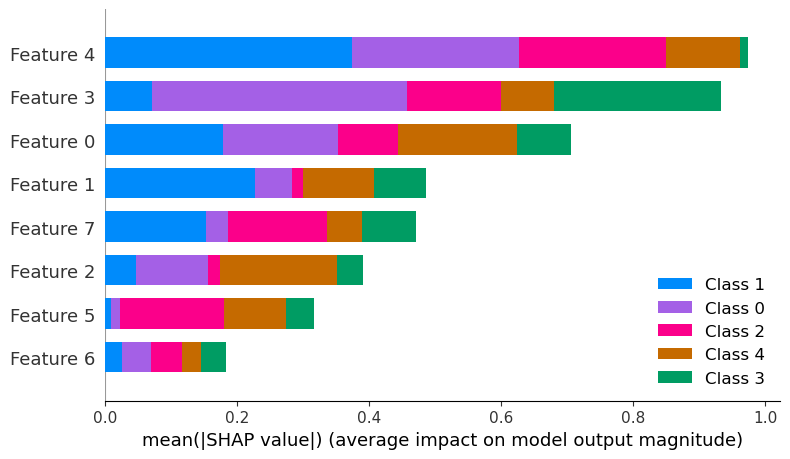

In [16]:
##how to open the blackbox for machine learning
#pip install shap
##Shapley value
import shap
#shap_values = shap.KernelExplainer(lr).shap_values(x1)
shap_values = shap.LinearExplainer(lr, x_train).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

# positive and negative relationships of the predictors with the target variable
shap.summary_plot(shap_values, x_train)  

In [17]:
##decision tree
from sklearn import tree, metrics
##entropy method
clr=tree.DecisionTreeClassifier(criterion='entropy',random_state=0)  ##other criteirion=gini...
clr.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
#generate evaluation metrics for train set
print("Train_accuracy:",metrics.accuracy_score(y_train,clr.predict(x_train)))
print("Train_confusion matrix:",metrics.confusion_matrix(y_train,clr.predict(x_train)))
print("Train_classification report:", metrics.classification_report(y_train,clr.predict(x_train)))
#generate evaluation metrics for test set
print("Test_accuracy:",metrics.accuracy_score(y_test,clr.predict(x_test)))
print("Test_confusion matrix:",metrics.confusion_matrix(y_test,clr.predict(x_test)))
print("Test_classification report:", metrics.classification_report(y_test,clr.predict(x_test)))

Train_accuracy: 0.9902912621359223
Train_confusion matrix: [[39  1  0  0  0]
 [ 0 39  0  0  0]
 [ 0  1 65  0  0]
 [ 0  0  0 30  0]
 [ 0  0  0  0 31]]
Train_classification report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.95      1.00      0.97        39
           2       1.00      0.98      0.99        66
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        31

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206

Test_accuracy: 0.30337078651685395
Test_confusion matrix: [[ 3  7  2  4  3]
 [ 9  9  3  1  1]
 [ 7  0 12  1  7]
 [ 4  2  3  2  0]
 [ 2  0  4  2  1]]
Test_classification report:               precision    recall  f1-score   support

           0       0.12      0.16      0.14        19
           1       0.50      0.39      0.44   

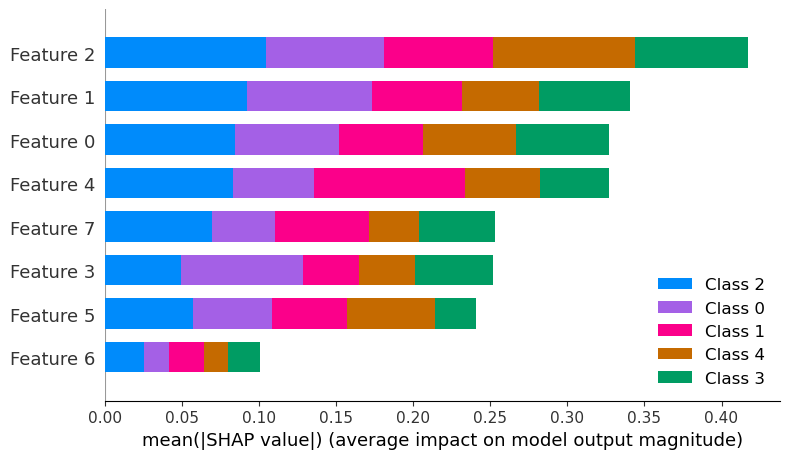

In [19]:
##Shapley value
import shap
#shap_values = shap.KernelExplainer(lr).shap_values(x1)
shap_values = shap.TreeExplainer(clr).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

Train_accuracy: 0.9757281553398058
Train_confusion matrix: [[39  1  0  0  0]
 [ 0 39  0  0  0]
 [ 0  1 64  1  0]
 [ 0  0  0 30  0]
 [ 0  1  1  0 29]]
Train_classification report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.93      1.00      0.96        39
           2       0.98      0.97      0.98        66
           3       0.97      1.00      0.98        30
           4       1.00      0.94      0.97        31

    accuracy                           0.98       206
   macro avg       0.98      0.98      0.98       206
weighted avg       0.98      0.98      0.98       206

Test_accuracy: 0.2808988764044944
Test_confusion matrix: [[ 3  6  5  5  0]
 [ 7  7  4  0  5]
 [ 7  1 14  1  4]
 [ 5  3  3  0  0]
 [ 2  1  4  1  1]]
Test_classification report:               precision    recall  f1-score   support

           0       0.12      0.16      0.14        19
           1       0.39      0.30      0.34    

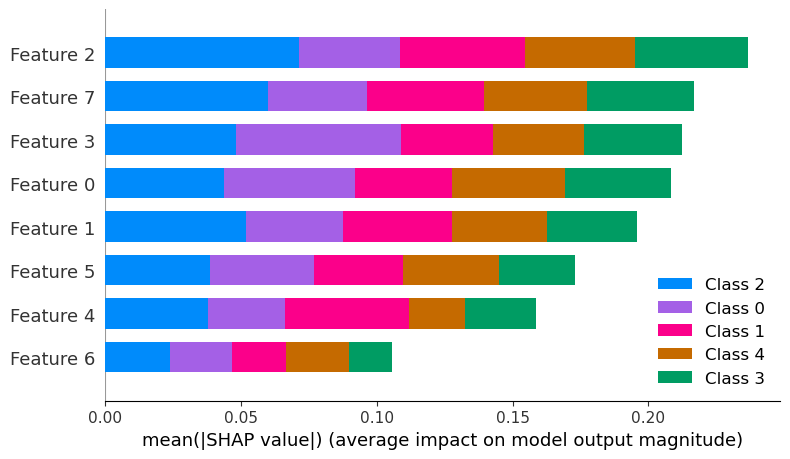

In [20]:
##decision tree
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
#from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, ConfusionMatrixDisplay

##entropy method
rlr=RandomForestClassifier(n_estimators=10,random_state=0)  
rlr.fit(x_train,y_train)

##test the model
from sklearn import metrics
#generate evaluation metrics for train set
print("Train_accuracy:",metrics.accuracy_score(y_train,rlr.predict(x_train)))
print("Train_confusion matrix:",metrics.confusion_matrix(y_train,rlr.predict(x_train)))
print("Train_classification report:", metrics.classification_report(y_train,rlr.predict(x_train)))
#generate evaluation metrics for test set
print("Test_accuracy:",metrics.accuracy_score(y_test,rlr.predict(x_test)))
print("Test_confusion matrix:",metrics.confusion_matrix(y_test,rlr.predict(x_test)))
print("Test_classification report:", metrics.classification_report(y_test,rlr.predict(x_test)))

##Shapley value
import shap
#shap_values = shap.KernelExplainer(lr).shap_values(x1)
shap_values = shap.TreeExplainer(rlr).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [21]:
##decision tree
from sklearn.svm import SVC
import sklearn.metrics
#from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, ConfusionMatrixDisplay
vlr=SVC(kernel='linear',C=1.0,random_state=0)  
vlr.fit(x_train,y_train)

##test the model
from sklearn import metrics
#generate evaluation metrics for train set
print("Train_accuracy:",metrics.accuracy_score(y_train,vlr.predict(x_train)))
print("Train_confusion matrix:",metrics.confusion_matrix(y_train,vlr.predict(x_train)))
print("Train_classification report:", metrics.classification_report(y_train,vlr.predict(x_train)))
#generate evaluation metrics for test set
print("Test_accuracy:",metrics.accuracy_score(y_test,vlr.predict(x_test)))
print("Test_confusion matrix:",metrics.confusion_matrix(y_test,vlr.predict(x_test)))
print("Test_classification report:", metrics.classification_report(y_test,vlr.predict(x_test)))

Train_accuracy: 0.35436893203883496
Train_confusion matrix: [[18  9 13  0  0]
 [ 5 17 17  0  0]
 [17 11 38  0  0]
 [ 6  8 16  0  0]
 [10  8 13  0  0]]
Train_classification report:               precision    recall  f1-score   support

           0       0.32      0.45      0.38        40
           1       0.32      0.44      0.37        39
           2       0.39      0.58      0.47        66
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        31

    accuracy                           0.35       206
   macro avg       0.21      0.29      0.24       206
weighted avg       0.25      0.35      0.29       206

Test_accuracy: 0.2247191011235955
Test_confusion matrix: [[ 6  8  5  0  0]
 [ 7  5 11  0  0]
 [11  7  9  0  0]
 [ 4  3  4  0  0]
 [ 2  4  3  0  0]]
Test_classification report:               precision    recall  f1-score   support

           0       0.20      0.32      0.24        19
           1       0.19      0.22      0.20   

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Using 206 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/206 [00:00<?, ?it/s]

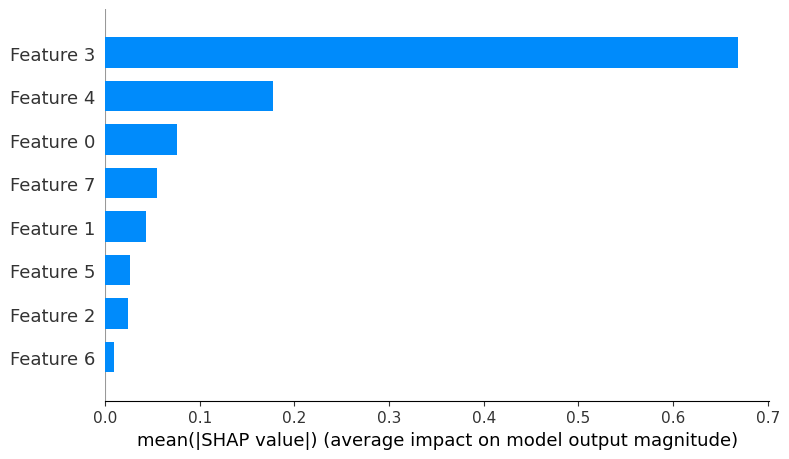

In [22]:
##Shapley value
import shap
#shap_values = shap.KernelExplainer(lr).shap_values(x1)
shap_values = shap.KernelExplainer(vlr.predict,x_train).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [23]:
##decision tree
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
#from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, ConfusionMatrixDisplay
nlr=KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')  
nlr.fit(x_train,y_train)

##test the model
from sklearn import metrics
#generate evaluation metrics for train set
print("Train_accuracy:",metrics.accuracy_score(y_train,nlr.predict(x_train)))
print("Train_confusion matrix:",metrics.confusion_matrix(y_train,nlr.predict(x_train)))
print("Train_classification report:", metrics.classification_report(y_train,nlr.predict(x_train)))
#generate evaluation metrics for test set
print("Test_accuracy:",metrics.accuracy_score(y_test,nlr.predict(x_test)))
print("Test_confusion matrix:",metrics.confusion_matrix(y_test,nlr.predict(x_test)))
print("Test_classification report:", metrics.classification_report(y_test,nlr.predict(x_test)))

Train_accuracy: 0.5388349514563107
Train_confusion matrix: [[27  3  6  2  2]
 [ 9 28  1  1  0]
 [12 10 42  1  1]
 [ 6  7  8  9  0]
 [ 8  7 10  1  5]]
Train_classification report:               precision    recall  f1-score   support

           0       0.44      0.68      0.53        40
           1       0.51      0.72      0.60        39
           2       0.63      0.64      0.63        66
           3       0.64      0.30      0.41        30
           4       0.62      0.16      0.26        31

    accuracy                           0.54       206
   macro avg       0.57      0.50      0.48       206
weighted avg       0.57      0.54      0.52       206

Test_accuracy: 0.19101123595505617
Test_confusion matrix: [[ 4  8  6  1  0]
 [10  6  6  0  1]
 [13  3  7  2  2]
 [ 4  2  5  0  0]
 [ 4  4  1  0  0]]
Test_classification report:               precision    recall  f1-score   support

           0       0.11      0.21      0.15        19
           1       0.26      0.26      0.26   

In [24]:
##Shapley value for KNN
import shap
#shap_values = shap.KernelExplainer(lr).shap_values(x1)
shap_values = shap.KernelExplainer(nlr.predict,x_train).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")
##take too long time.

Using 206 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/206 [00:00<?, ?it/s]